In [12]:
import pandas as pd
import numpy as np
import json

path = 'datasets/bitly_usagov/example.txt'

#檢查第一行字串
#一行文字為json格式的字串
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [22]:
#檢查example.txt每一行的字串
#for line in open(path):
#   print(line)

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [23]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [33]:
#利用value_counts(),查看相同內容的筆數
tz_counts = frame['tz'].value_counts()

#檢查前20筆數
tz_counts[:20]

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
Europe/London             74
Asia/Tokyo                37
Pacific/Honolulu          36
Europe/Madrid             35
America/Sao_Paulo         33
Europe/Berlin             28
Europe/Rome               27
America/Rainy_River       25
Europe/Amsterdam          22
America/Phoenix           20
America/Indianapolis      20
Europe/Warsaw             16
America/Mexico_City       15
Europe/Stockholm          14
Europe/Paris              14
Name: tz, dtype: int64

In [39]:
#整理資料
#Nan資料填入'Missing'
clean_tz = frame['tz'].fillna('Missing')

#空字串資料填入'Unknown'
clean_tz[clean_tz == ''] = 'Unknown'

#使用value_counts()統計內容相同筆數
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

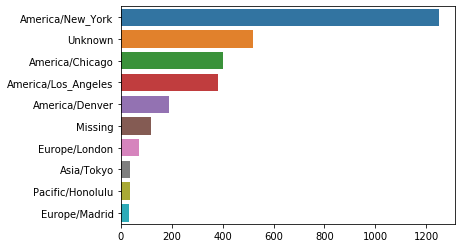

In [40]:
#利用seaborn 繪圖
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)